<a href="https://colab.research.google.com/github/numustafa/ML-Projects-/blob/main/Google%20Cloud%20Kaggle%20Competition/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End ML Project
In this project, I will be using my skills in Data Analysis and concepts of Machine Learning to develop a predictive model, that predicts the taxi fare for a ride in NYC. I am using a dataset from [Kaggle](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) by Google Cloud. My main Goal is to attain respectable score in the competition using just the fraction of the data. The project follows the following sequence:
1. Download Dataset
2. Data Exploration
3. Data Modelling
4. Model (Hardcoded & baseline) Models
5. Generate Predictions
6. Feature Engineering
7. Train & Evaluate Different Models
8. Hyperparameter Tuning
9. Train on GPU
10. documentation & Publishing


## 1. Dataset
* Install necessary Lib
* download data from Kaggle
* convert data into workable DataFrame

In [2]:
# lib
!pip install opendatasets --upgrade --quiet   # Lib by Jovian to download the public datasets from Kaggle
import opendatasets as od
od.version()

dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'     # url for competition
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:18<00:00, 88.9MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [3]:
data_dir = "new-york-city-taxi-fare-prediction"

In [4]:
# visualize the data
!ls -lh {data_dir}        # ! - This is for system var

total 5.4G
-rw-r--r-- 1 root root  486 Dec  2 21:26 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Dec  2 21:26 sample_submission.csv
-rw-r--r-- 1 root root 960K Dec  2 21:26 test.csv
-rw-r--r-- 1 root root 5.4G Dec  2 21:27 train.csv


This shows almost 5.4GB of Data, out of which almost entirely is the Train set, a tiny test file, sample submission and information file.

In [5]:
# check the no of rows in trainset
!wc -l {data_dir}/train.csv
!wc -l {data_dir}/test.csv

55423856 new-york-city-taxi-fare-prediction/train.csv
9914 new-york-city-taxi-fare-prediction/test.csv


Almost 55.4 million observations in the training set, while only 9900 observations for test set.

In [6]:
# check the head of train data
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

first 10 rows, including header. Each row has a unique identifier, interms of date, time & serial no.

In [7]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

The test data also has a key column and other cols as train set, except the fare amount column.

In [8]:
# submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


The sample submission contains exactly the same keys as test set, and a a sample fare amount (which later be replaced with the prediction fare amount)

#### Observations:
* This is a supervised Learning regression problem.
* Training Data is 5.4GB
* The Data file contains Tran, Test, sample submission and info files.
* Test set is much smaller (< 10000 rows)
* The training set has 8 columns:
  * `key`,   (unique identifier)
  * `fare_amount`,   (Target variable)
  * `pickup_datetime`,
  * `pickup_longitude`,
  * `pickup_latitude`,
  * `dropoff_longitude`,
  * `dropoff_latitude`,
  * `passenger_count`
* The test set has every column except target column
* Submission file has key (same as test set) and sample target column

Starting off with a sample of training set (1% of data) 55k rows, which is itself huge, to iterate faster.

In [9]:
# lib
import pandas as pd
import random
import numpy as np

sample_frac = 0.01

In [10]:
# taking all cols except key col
selected_cols = "fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count".split(",")
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [11]:
# set the dtypes of data
dtypes = {
  'fare_amount' : "float32",
  'pickup_longitude' : "float32",
  'pickup_latitude' : "float32",
  'dropoff_longitude' : "float32",
  'dropoff_latitude' : "float32",
  'passenger_count' : "uint8"
}

# skip row
def skip_row(key):
  if key == 0:
    return False
  else:
    return random.random()> sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols= selected_cols,
                 dtype= dtypes,
                 parse_dates= ['pickup_datetime'],
                 skiprows= skip_row)

In [12]:
# test data
test_df = pd.read_csv(data_dir+"/test.csv", dtype= dtypes)


In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


In [14]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


## 2. Dataset Exploration
* Basic info about training set
* Basic info about test set
* Basic Exploratory Analysis


In [15]:
# Training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


No missing values

In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float32
 3   pickup_latitude    9914 non-null   float32
 4   dropoff_longitude  9914 non-null   float32
 5   dropoff_latitude   9914 non-null   float32
 6   passenger_count    9914 non-null   uint8  
dtypes: float32(4), object(2), uint8(1)
memory usage: 319.6+ KB


In [18]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [19]:
df["pickup_datetime"].min(), df["pickup_datetime"].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations:
* As expected 552k rows in Train & 9.9k rows in test set.
* No missing values in either data
* `fare_amount` in train set ranges from -$/ 52.0 to $/499.0. The negative fare seems odd.
* `passenger_count` in train set ranges from 0 - 208. Though 75% or less rides has only upto 2 passangers, so either its a fleet booking or some error. In test set thoug, it is quite reasonable, upto 6.
* In train set, the longititude values ranges fom -3356.7 - 2467.7 & latitude values have a range -3084.7 - 3351.4. In test set, the longitude values are -74.4 - -72.2 & latitude values are 40.5 - 41.6. There seems to be abruption in train set values, required fixing, and should be brought in range of test set.
* Data is b/w 1 Jan 2009 - 30 June 2015 (both, train & test)


### 2.1 Exploratory Data Analysis

In this section, I will be exploring the following metrics for this fraction data, and later compare it with the original data metrics:
1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fare the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?
7. how passanger

## 3. Data Modelling - Prepare Data for Training

* Split Training & Validation set
* Extract Inputs /outputs

In [20]:
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

len(train_df), len(val_df)


(441960, 110490)

In [21]:
# Drop any na values
train_df = train_df.dropna()
val_df = val_df.dropna()

In [22]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [23]:
# input & output cols
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = 'fare_amount'

In [24]:
# Train inputs & outputs
X_train = train_df[input_cols]
y_train = train_df[target_col]


In [25]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [26]:
y_train

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [27]:
# validation input & target
X_val = val_df[input_cols]
y_val = val_df[target_col]

In [28]:
X_val

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [29]:
y_val

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test Data


In [30]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## 4. Train & Evaluate Hardcoded (Simple) Model

* Hardcoded Model: Always predicts the avg fare
* Baseline Model: Linear Regression

For evaluation of model prediction, we use rmse criteria, as mentioned in the [Kaggle](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/overview) competition brief

### 4.1 Train & Evaluate Hardcoded Model

In [31]:
import numpy as np

a = np.full(10, 3)        # return array of 10 values whuich arw 3
np.full(a.shape[0], 2)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
class MeanRegressor:

  # Takes inputs & targets for training and calc the avg of targets
  def fit(self, inputs, targets):
    self.mean_= targets.mean()

  # Takes inputs and creates targets for prediction
  def predict(self, inputs):
    preds_ = np.full(inputs.shape[0], self.mean_)    # takes the shape of input (val or test inputs) and fill the whole shape with avg
    return preds_

In [33]:
# model
mean_model = MeanRegressor()

# fit the model
mean_model.fit(X_train, y_train)

In [34]:
# check the mean (avg for each row of training set)
mean_model.mean_

11.354714

In [35]:
# prediction from mean_model (training set)
train_preds = mean_model.predict(X_train)

# check the predictions (mean)
train_preds, len(train_preds)

(array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
        11.354714], dtype=float32),
 441960)

In [36]:
y_train

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [37]:
# prediction from mean_model (validation set)
val_preds = mean_model.predict(X_val)
val_preds, len(val_preds)

(array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
        11.354714], dtype=float32),
 110490)

In [38]:
y_val

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Evaluation
* y_train with train_preds
* y_val with val_preds

criteria with rmse

In [39]:
from sklearn.metrics import mean_squared_error


In [40]:
# rmse
def rmse(targets, predictions):
  root_mse = mean_squared_error(targets, predictions, squared=False)
  return root_mse

In [41]:
train_rmse = rmse(y_train, train_preds)
val_rmse = rmse(y_val, val_preds)

train_rmse, val_rmse

(9.789782, 9.899954)

On avg, our mean model prediction deviates from train targets (y_train) is Dollar 9.7 off from each fare & from validation targets (y_val) is Dollar 9.8.

Now any model should do better than this basic hardcoded model.

### 4.2 Train & Evaluate baseline Model

In [42]:
from sklearn.linear_model import LinearRegression


In [43]:
# model
model = LinearRegression()

#### Train Data

In [44]:
# fit the model
model.fit(X_train, y_train)

# generate predictions from the model
train_preds = model.predict(X_train)
train_preds

array([11.546237, 11.28461 , 11.28414 , ..., 11.458918, 11.284281,
       11.284448], dtype=float32)

#### Valuidation Data

In [45]:
# fit the model
model.fit(X_val, y_val)

# generate predictions from the model
val_preds = model.predict(X_val)
val_preds

array([11.260979, 11.260483, 11.265014, ..., 12.472838, 11.260638,
       11.259938], dtype=float32)

Appearwntly, the predictions are bit differe for each dataset but one this is certain that they are way off from actual targets

#### Evaluation: rmse

In [46]:
rmse(y_train, train_preds), rmse(y_val, val_preds)

(9.788632, 9.8972435)

The Linear model behaves similar to our hardcoded mean model.

## 5. Kaggle Submission

In [47]:
# test dataset
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [48]:
# prediction on test set
test_preds = model.predict(test_inputs)        # we dont have any targets

### 5.1 Create a Submission File
Since we dont have any targets in test set, like in train and validation set. Thus, the only way to evaluate the test predictions is to create a submission file.
* Read-in the submission Dataframe (a sample submission file)
* Replace the sample targets with test predictions (as rows in submission file are same as rows in test se)
* save the amended datarrame. (csv or anyother req format)


/content/new-york-city-taxi-fare-prediction

In [49]:
# read the submission dataframe
sub_df = pd.read_csv(data_dir+"/sample_submission.csv")
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [50]:
# Replace the fareamount with our test predictions
sub_df["fare_amount"] = test_preds
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.260607
1,2015-01-27 13:08:24.0000003,11.260733
2,2011-10-08 11:53:44.0000002,11.260632
3,2012-12-01 21:12:12.0000002,11.260368
4,2012-12-01 21:12:12.0000003,11.260462
...,...,...
9909,2015-05-10 12:37:51.0000002,11.741592
9910,2015-01-12 17:05:51.0000001,11.741496
9911,2015-04-19 20:44:15.0000001,11.746951
9912,2015-01-31 01:05:19.0000005,11.741279


In [51]:
# create a submission file
sub_df.to_csv("linear_model_submission.csv", index=None)


In Kaggle it shows a score of 9.4, which appearently near to our test rmse score.

#### Reusable function

In [52]:
def predict_and_submit(model, test_inputs, file_name):
  # 1- create test predictions
  test_preds = model.predict(test_inputs)
  # 2- read the submission file
  sub_df = pd.read_csv(data_dir+"/sample_submission.csv")
  # 3- replate the submission fares with test predictions
  sub_df["fare_amount"] = test_preds
  # 4- Export it ro csv
  sub_df.to_csv(file_name, index=None)
  return sub_df




It is import to track the ideas systematically to avoid become overwhelmed with dozenss of models.

## 6. Feature Engineering


In [53]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

#### Date & Time Evaluation

In [54]:
# Check date and time
def add_dateparts(df, col):
  df[col + "_year"] = df[col].dt.year
  df[col + "_month"] = df[col].dt.month
  df[col + "_day"] = df[col].dt.day
  df[col + "_weekday"] = df[col].dt.weekday
  df[col + "_hour"] = df[col].dt.hour


In [55]:
add_dateparts(df, 'pickup_datetime')

In [56]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [57]:
# test data
df_test = pd.read_csv(data_dir+"/test.csv", dtype= dtypes, parse_dates=['pickup_datetime'])
add_dateparts(df_test, 'pickup_datetime')

#### Add Distance b/w pickup and drop locations
* Link for [Haversine formula](https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas)

In [58]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378.137 * c
    return km

In [59]:
def add_trip_distance(df):
  df["trip distance"] = haversine_np(df['pickup_longitude'],
                                     df['pickup_latitude'],
                                     df['dropoff_longitude'],
                                     df['dropoff_latitude'])

In [60]:
add_trip_distance(df)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014,12,6,5,20,0.399627
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17,0.000000
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011,6,15,2,18,2.121409
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009,12,14,0,12,0.000000
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013,11,6,2,11,1.409321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,2014,2,6,3,23,16.268991
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,2015,1,5,0,15,9.116902
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,2013,2,17,6,22,1.066791
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,2013,1,27,6,12,5.861788


In [61]:
add_trip_distance(df_test)
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.325961
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.428016
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.619096
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.963109
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.126979
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.274802
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.205069
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.352739


#### Add distance from popular landmark
* JFK airport
* LGA Airport
* EWR Airport
* Times Square
* Met Meuseum
* WTC



In [62]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099,40.7126

In [63]:
def add_landmark_dropoff_dist(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name + "_drop_dist"] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [64]:
def add_landmark(df):
  landmarks = [("JFK", jfk_lonlat), ("LGA", lga_lonlat), ("EWR", ewr_lonlat),
   ("MET", met_lonlat), ("WTC", wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_dist(df, name, lonlat)

In [65]:
add_landmark(df)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance,JFK_drop_dist,LGA_drop_dist,EWR_drop_dist,MET_drop_dist,WTC_drop_dist
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014,12,6,5,20,0.399627,21.221033,9.204256,18.021107,2.993837,5.421117
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17,0.000000,8656.397461,8667.154297,8690.285156,8674.595703,8677.096680
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011,6,15,2,18,2.121409,21.973690,8.912198,18.618332,1.914890,6.592626
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009,12,14,0,12,0.000000,20.799564,9.778086,17.373161,4.081889,4.357259
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013,11,6,2,11,1.409321,21.019598,7.480488,19.968115,1.205594,7.426447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,2014,2,6,3,23,16.268991,19.223614,22.094446,17.618113,19.891378,12.241551
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,2015,1,5,0,15,9.116902,19.951382,10.938635,16.467789,6.138939,2.592159
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,2013,2,17,6,22,1.066791,21.608961,11.261868,15.889705,5.284069,3.215056
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,2013,1,27,6,12,5.861788,21.900480,9.942351,17.344229,3.359720,5.173751


In [66]:
add_landmark(df_test)
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance,JFK_drop_dist,LGA_drop_dist,EWR_drop_dist,MET_drop_dist,WTC_drop_dist
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.325961,20.610901,9.777240,17.377186,4.246758,4.226088
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.428016,21.588675,11.335785,15.817243,5.392295,3.103555
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.619096,20.630093,9.543493,17.607712,3.953624,4.522400
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.963109,21.727304,10.212925,16.999334,3.850616,4.645160
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.393246,21.150925,10.313868,16.837767,4.441519,3.974163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.126979,21.544802,6.892941,21.051773,0.646812,8.825333
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.274802,21.499725,7.267621,20.500252,0.421076,8.243552
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.205069,1.171150,16.112627,32.829693,20.770506,19.968605
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.352739,22.441605,6.149256,23.451723,3.206389,11.576398


#### Removing Outliers from `df`

In [67]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance,JFK_drop_dist,LGA_drop_dist,EWR_drop_dist,MET_drop_dist,WTC_drop_dist
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983,2011.740594,6.265061,15.728312,3.037540,13.507121,20.215881,193.913803,183.112335,192.174988,178.151657,179.642227
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664,1.857929,3.434707,8.692849,1.950016,6.514837,376.423218,1226.712402,1229.779297,1231.632324,1231.502930,1231.602661
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.109211,0.116606,0.129472,0.031250,0.009297
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.215272,20.573002,8.363847,16.530221,2.170047,3.647676
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.121526,21.240396,9.594092,18.048276,3.820544,5.570291
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.883994,21.987854,11.144384,19.989779,6.075133,7.832419
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16943.013672,15084.014648,15101.015625,15101.091797,15103.990234,15098.480469


#### Removing Outliers
* fare amount: should be greater than zero
* longitudes: -75 to -72
* latitude: 40 to 42
* parranger counts: 1 to 6

In [68]:
def remove_outliers(df):
    # Calculate IQR for fare_amount
    Q1 = df['fare_amount'].quantile(0.25)
    Q3 = df['fare_amount'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for fare_amount
    fare_lower_bound = Q1 - 1.5 * IQR
    fare_upper_bound = Q3 + 1.5 * IQR

    # Define geographical bounds based on percentiles or domain knowledge
    pickup_longitude_lower = df['pickup_longitude'].quantile(0.01)
    pickup_longitude_upper = df['pickup_longitude'].quantile(0.99)
    dropoff_longitude_lower = df['dropoff_longitude'].quantile(0.01)
    dropoff_longitude_upper = df['dropoff_longitude'].quantile(0.99)
    pickup_latitude_lower = df['pickup_latitude'].quantile(0.01)
    pickup_latitude_upper = df['pickup_latitude'].quantile(0.99)
    dropoff_latitude_lower = df['dropoff_latitude'].quantile(0.01)
    dropoff_latitude_upper = df['dropoff_latitude'].quantile(0.99)

    # Filter outliers
    filtered_df = df[
        (df['fare_amount'] >= fare_lower_bound) & (df['fare_amount'] <= fare_upper_bound) &
        (df['pickup_longitude'] >= pickup_longitude_lower) & (df['pickup_longitude'] <= pickup_longitude_upper) &
        (df['dropoff_longitude'] >= dropoff_longitude_lower) & (df['dropoff_longitude'] <= dropoff_longitude_upper) &
        (df['pickup_latitude'] >= pickup_latitude_lower) & (df['pickup_latitude'] <= pickup_latitude_upper) &
        (df['dropoff_latitude'] >= dropoff_latitude_lower) & (df['dropoff_latitude'] <= dropoff_latitude_upper) &
        (df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)
    ]

    return filtered_df


In [69]:
filtered_df = remove_outliers(df)
filtered_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance,JFK_drop_dist,LGA_drop_dist,EWR_drop_dist,MET_drop_dist,WTC_drop_dist
count,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000,488886.000000
mean,8.855628,-72.539886,39.962006,-72.541290,39.963154,1.685642,2011.707521,6.248197,15.723985,3.039208,13.553450,17.177008,188.720123,177.651199,186.450729,172.292740,173.825012
std,4.074859,10.218822,5.617069,10.208743,5.613880,1.303472,1.857903,3.438166,8.691830,1.947004,6.508348,350.157501,1190.316528,1193.385742,1195.402222,1195.187744,1195.325439
min,-3.700000,-74.014343,0.000000,-74.015396,0.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.109211,0.116606,13.504388,0.031250,0.009297
25%,5.700000,-73.992088,40.736366,-73.991508,40.735863,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.158557,20.638091,8.389518,16.521300,2.068610,3.561544
50%,8.000000,-73.982208,40.752552,-73.980911,40.753197,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,1.938926,21.254583,9.574295,17.957292,3.557279,5.425284
75%,11.000000,-73.969460,40.766033,-73.966972,40.766960,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.225096,21.966101,10.992705,19.644633,5.616965,7.439320
max,22.250000,0.000000,40.806870,0.000000,40.830990,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,8677.585938,8656.397461,8667.154297,8690.285156,8674.595703,8677.096680


#### Getting some insights
* What is the busiest day of the week?
* What is the busiest time of the day?
* In which month are fare the highest?
* Which pickup locations have the highest fares?
* Which drop locations have the highest fares?
* What is the average ride distance?


In [70]:
# what is the busiest day of the week?
filtered_df.groupby("pickup_datetime_weekday").size()

pickup_datetime_weekday
0    62599
1    68614
2    71124
3    72831
4    75390
5    75057
6    63271
dtype: int64

Thursday and friday appeared to be the busiest dayes interms of trips.

In [71]:
filtered_df.groupby("pickup_datetime_day").size()

pickup_datetime_day
1     15177
2     15257
3     15260
4     15450
5     16052
6     15982
7     16170
8     16042
9     16391
10    16634
11    16647
12    16525
13    16769
14    16477
15    16658
16    16553
17    16710
18    16454
19    16586
20    16363
21    16248
22    16387
23    16038
24    16022
25    15220
26    15660
27    15239
28    15576
29    14725
30    14442
31     9172
dtype: int64

In [72]:
# What is the busiest time of the day
filtered_df.groupby("pickup_datetime_hour").size()

pickup_datetime_hour
0     19170
1     14550
2     10590
3      7834
4      5248
5      4062
6      9573
7     17633
8     22155
9     23200
10    22334
11    23083
12    23923
13    23826
14    24525
15    23033
16    19754
17    24177
18    29722
19    31432
20    29312
21    28330
22    27370
23    24050
dtype: int64

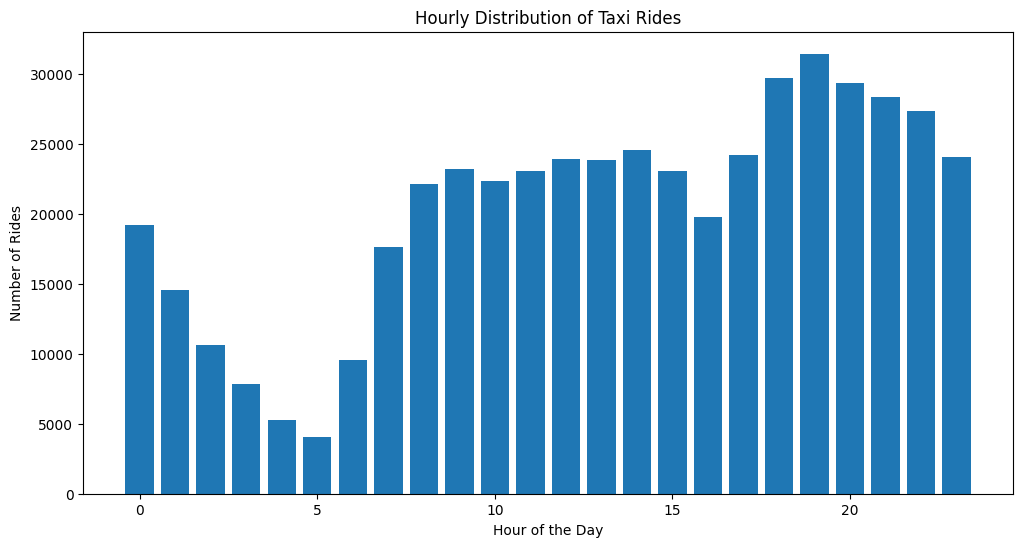

In [73]:
import matplotlib.pyplot as plt

# Group and count data by hour
hourly_distribution = filtered_df.groupby("pickup_datetime_hour").size()

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the size of the figure as needed
plt.bar(hourly_distribution.index, hourly_distribution.values)

# Adding titles and labels
plt.title('Hourly Distribution of Taxi Rides')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')

# Show the plot
plt.show()

This shows the no of rides significantly increases from 0800 and peaked till 1400, a sligh dip for 2 hrs then a significant increase in late hours of the day. This shows the vibrant and dynamicism of NYC and on top of explains the phenomenon of people taking cabs during office hours. The mose busiest hour is 1800-2000, indicating people leaving officeds and going to home.

In [74]:
# Group by month and calculate average fare
average_fare_per_month = filtered_df.groupby('pickup_datetime_month')['fare_amount'].mean()

# Find the month with the highest average fare
month_with_highest_fare = average_fare_per_month.idxmax()

print(f"Month with the highest average fare: {month_with_highest_fare}")

Month with the highest average fare: 9


In [75]:
# Which pickup locations have the highest fares?
# Group by pickup location and calculate average fare
average_fare_per_location = filtered_df.groupby(['pickup_latitude', 'pickup_longitude'])['fare_amount'].mean()

# Optionally, filter out locations with very few rides to get more reliable averages
count_rides_per_location = filtered_df.groupby(['pickup_latitude', 'pickup_longitude']).size()
reliable_locations = count_rides_per_location[count_rides_per_location > 10].index
average_fare_per_location = average_fare_per_location.loc[reliable_locations]

# Find the location with the highest average fare
location_with_highest_fare = average_fare_per_location.idxmax()

print(f"Pickup location with the highest average fare: {location_with_highest_fare}")

Pickup location with the highest average fare: (40.758243560791016, -73.9374771118164)


In [76]:
# Which drop locations have the highest fares?
# Group by pickup location and calculate average fare
average_fare_per_location = filtered_df.groupby(['dropoff_latitude', 'dropoff_longitude'])['fare_amount'].mean()

# Optionally, filter out locations with very few rides to get more reliable averages
count_rides_per_location = filtered_df.groupby(['dropoff_latitude', 'dropoff_longitude']).size()
reliable_locations = count_rides_per_location[count_rides_per_location > 10].index
average_fare_per_location = average_fare_per_location.loc[reliable_locations]

# Find the location with the highest average fare
location_with_highest_fare = average_fare_per_location.idxmax()

print(f"Drop-off location with the highest average fare: {location_with_highest_fare}")

Drop-off location with the highest average fare: (40.758243560791016, -73.9374771118164)


In [77]:
# What is the average ride distance?  1.93 km


#### Scaling with one-hot encoding


In [78]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488886 entries, 0 to 552449
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   fare_amount              488886 non-null  float32            
 1   pickup_datetime          488886 non-null  datetime64[ns, UTC]
 2   pickup_longitude         488886 non-null  float32            
 3   pickup_latitude          488886 non-null  float32            
 4   dropoff_longitude        488886 non-null  float32            
 5   dropoff_latitude         488886 non-null  float32            
 6   passenger_count          488886 non-null  uint8              
 7   pickup_datetime_year     488886 non-null  int64              
 8   pickup_datetime_month    488886 non-null  int64              
 9   pickup_datetime_day      488886 non-null  int64              
 10  pickup_datetime_weekday  488886 non-null  int64              
 11  pickup_dateti

## 7. Train & Evaluate Different Models
* Linear Regression
* Random Forests
* Gradient Boosting
* Train Ridge
* SVM
* KNN
* Decision Trees

In [79]:
# Devide Train and validation set of the filtered data


train_df, val_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

len(train_df), len(val_df)

(391108, 97778)

In [80]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip distance',
       'JFK_drop_dist', 'LGA_drop_dist', 'EWR_drop_dist', 'MET_drop_dist',
       'WTC_drop_dist'],
      dtype='object')

In [81]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip distance',
       'JFK_drop_dist', 'LGA_drop_dist', 'EWR_drop_dist', 'MET_drop_dist',
       'WTC_drop_dist']
target_col = 'fare_amount'

In [82]:
X_train = train_df[input_cols]
y_train = train_df[target_col]
X_val = val_df[input_cols]
y_val = val_df[target_col]

In [83]:
X_test = df_test[input_cols]
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip distance,JFK_drop_dist,LGA_drop_dist,EWR_drop_dist,MET_drop_dist,WTC_drop_dist
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.325961,20.610901,9.777240,17.377186,4.246758,4.226088
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.428016,21.588675,11.335785,15.817243,5.392295,3.103555
2,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.619096,20.630093,9.543493,17.607712,3.953624,4.522400
3,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.963109,21.727304,10.212925,16.999334,3.850616,4.645160
4,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.393246,21.150925,10.313868,16.837767,4.441519,3.974163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.126979,21.544802,6.892941,21.051773,0.646812,8.825333
9910,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.274802,21.499725,7.267621,20.500252,0.421076,8.243552
9911,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.205069,1.171150,16.112627,32.829693,20.770506,19.968605
9912,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.352739,22.441605,6.149256,23.451723,3.206389,11.576398


#### Evaluater Function

In [84]:
def evaluate(model):
  train_preds = model.predict(X_train)
  train_rmse = mean_squared_error(y_train, train_preds, squared=False)
  val_preds = model.predict(X_val)
  val_rmse = mean_squared_error(y_val, val_preds, squared=False)
  values = f"train rmse is {train_rmse} & validation rmse is {val_rmse}"
  return print(values, train_preds, val_preds)


#### Ridge Regression

In [85]:
from sklearn.linear_model import Ridge

In [86]:
model_1 = Ridge(random_state=42, alpha=0.9)
model_1.fit(X_train, y_train)

Ridge(alpha=0.9, random_state=42)

In [87]:
evaluate(model_1)

train rmse is 3.876936446630496 & validation rmse is 3.8716660026564225 [7.5656418  9.65238675 7.88660566 ... 7.80471478 7.46099557 7.94764097] [ 9.75955733  8.83385945  9.42424727 ...  7.60323465  9.93938669
 13.01596256]


This is quite impressive, as rmse is lower and almost the same in both the dataset.

In [88]:
X_train.shape

(391108, 16)

In [89]:
# submit our prediction for this model
predict_and_submit(model_1, X_test, "ridge_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.358215
1,2015-01-27 13:08:24.0000003,9.683727
2,2011-10-08 11:53:44.0000002,8.606855
3,2012-12-01 21:12:12.0000002,9.075163
4,2012-12-01 21:12:12.0000003,9.177118
...,...,...
9909,2015-05-10 12:37:51.0000002,9.156572
9910,2015-01-12 17:05:51.0000001,8.345974
9911,2015-04-19 20:44:15.0000001,14.578782
9912,2015-01-31 01:05:19.0000005,11.850351


#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
model_2 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=10, n_estimators=100)


model_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [94]:
evaluate(model_2)

train rmse is 2.0295198465691473 & validation rmse is 2.070229983341634 [12.79926229 13.1385628   6.1071235  ...  8.12727205  6.7621103
  5.57154785] [10.30250512  5.5939328   5.02016059 ...  5.94557175 14.42830838
 19.29013153]


In [96]:
predict_and_submit(model_2, X_test, "rd_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.974074
1,2015-01-27 13:08:24.0000003,10.593644
2,2011-10-08 11:53:44.0000002,4.703884
3,2012-12-01 21:12:12.0000002,8.279552
4,2012-12-01 21:12:12.0000003,14.460325
...,...,...
9909,2015-05-10 12:37:51.0000002,8.635289
9910,2015-01-12 17:05:51.0000001,12.640678
9911,2015-04-19 20:44:15.0000001,8.869306
9912,2015-01-31 01:05:19.0000005,19.539758


#### Gradient Boost

In [97]:
from xgboost import XGBRegressor

In [99]:
model_3 = XGBRegressor(max_depth = 5, objective = "reg:squarederror",
                       n_estimators = 3, random_state = 42, n_jobs=-1)
model_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
evaluate(model_3)

train rmse is 2.525857448577881 & validation rmse is 2.5148088932037354 [10.996179 12.24181   7.086952 ...  8.034652  7.458472  6.547635] [10.386708   6.9832063  6.2881165 ...  6.8784122 11.607562  15.360149 ]


In [101]:
predict_and_submit(model_3, X_test, "xgboose_submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.785427
1,2015-01-27 13:08:24.0000003,9.785427
2,2011-10-08 11:53:44.0000002,6.288116
3,2012-12-01 21:12:12.0000002,8.066292
4,2012-12-01 21:12:12.0000003,12.564010
...,...,...
9909,2015-05-10 12:37:51.0000002,8.901355
9910,2015-01-12 17:05:51.0000001,11.030882
9911,2015-04-19 20:44:15.0000001,11.598914
9912,2015-01-31 01:05:19.0000005,15.360149


## 8. Hyperparamete Tuning
